1. 평가
심사 기준: macro f1-score

2. 데이터 허용 범위 및 사전 학습 모델
- 사용에 법적 제약이 없고, 공개된 외부 데이터 사용 가능
- 단, Test Dataset이 포함된 데이터로 사전 학습된 모델 사용 금지
- 대회 제공 데이터 이외의 외부 데이터 사용 금지
- 대회 제공 데이터 중 Train Dataset (train.csv)만 모델 학습에 사용 가능
- 대회 제공 데이터 중 Validation Dataset (validation.csv)은 모델 학습에 사용은 불가능하지만 데이터 통계 정보와 모델 평가에는 사용 가능
- 대회 제공 데이터 중 Test Dataset (test.csv)은 리더보드 제출을 위한 추론에만 사용 가능 (모델 학습 사용 불가능)
- Data Leakage가 의심되는 경우 코드를 요청할 수 있음 


# 데이터 불러오기
train, valid만 불러올 것

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd /content/drive/MyDrive/이화/ESAA/프로젝트

/content/drive/MyDrive/이화/ESAA/프로젝트


In [5]:
import pandas as pd
# import numpy as np

In [8]:
train = pd.read_csv("train.csv")
train.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113842 entries, 0 to 113841
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      113842 non-null  int64  
 1   V1      113842 non-null  float64
 2   V2      113842 non-null  float64
 3   V3      113842 non-null  float64
 4   V4      113842 non-null  float64
 5   V5      113842 non-null  float64
 6   V6      113842 non-null  float64
 7   V7      113842 non-null  float64
 8   V8      113842 non-null  float64
 9   V9      113842 non-null  float64
 10  V10     113842 non-null  float64
 11  V11     113842 non-null  float64
 12  V12     113842 non-null  float64
 13  V13     113842 non-null  float64
 14  V14     113842 non-null  float64
 15  V15     113842 non-null  float64
 16  V16     113842 non-null  float64
 17  V17     113842 non-null  float64
 18  V18     113842 non-null  float64
 19  V19     113842 non-null  float64
 20  V20     113842 non-null  float64
 21  V21     11

In [47]:
test = pd.read_csv("test.csv")
test.head(3)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142503 entries, 0 to 142502
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      142503 non-null  object 
 1   V1      142503 non-null  float64
 2   V2      142503 non-null  float64
 3   V3      142503 non-null  float64
 4   V4      142503 non-null  float64
 5   V5      142503 non-null  float64
 6   V6      142503 non-null  float64
 7   V7      142503 non-null  float64
 8   V8      142503 non-null  float64
 9   V9      142503 non-null  float64
 10  V10     142503 non-null  float64
 11  V11     142503 non-null  float64
 12  V12     142503 non-null  float64
 13  V13     142503 non-null  float64
 14  V14     142503 non-null  float64
 15  V15     142503 non-null  float64
 16  V16     142503 non-null  float64
 17  V17     142503 non-null  float64
 18  V18     142503 non-null  float64
 19  V19     142503 non-null  float64
 20  V20     142503 non-null  float64
 21  V21     14

In [14]:
valid = pd.read_csv("val.csv")
valid.head(3)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0


In [ ]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28462 entries, 0 to 28461
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      28462 non-null  int64  
 1   V1      28462 non-null  float64
 2   V2      28462 non-null  float64
 3   V3      28462 non-null  float64
 4   V4      28462 non-null  float64
 5   V5      28462 non-null  float64
 6   V6      28462 non-null  float64
 7   V7      28462 non-null  float64
 8   V8      28462 non-null  float64
 9   V9      28462 non-null  float64
 10  V10     28462 non-null  float64
 11  V11     28462 non-null  float64
 12  V12     28462 non-null  float64
 13  V13     28462 non-null  float64
 14  V14     28462 non-null  float64
 15  V15     28462 non-null  float64
 16  V16     28462 non-null  float64
 17  V17     28462 non-null  float64
 18  V18     28462 non-null  float64
 19  V19     28462 non-null  float64
 20  V20     28462 non-null  float64
 21  V21     28462 non-null  float64
 22

In [ ]:
# valid 데이터에서의 target label 비율

valid['Class'].value_counts()[1] / len(valid)

0.0010540369615627855

# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

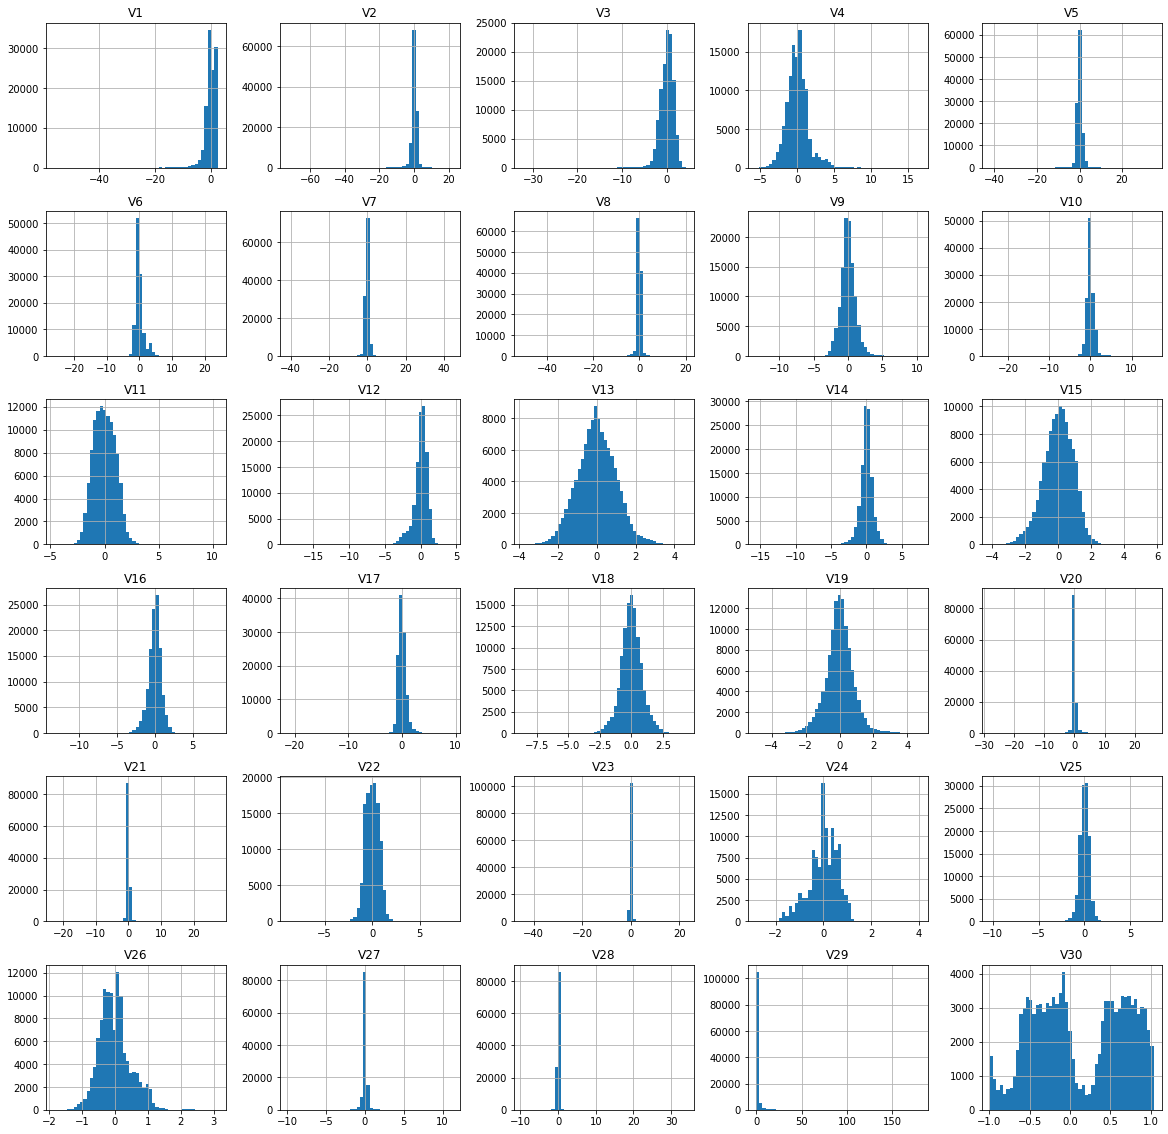

In [ ]:
train.drop(columns=['ID']).hist(bins = 50, figsize = (20,20))
plt.show()

v1, v2, v3, v12, v29 : scale 필요한가?

데이터 특징
- train에 정답 없음 : 비지도 학습 해야 함
- 아주 심각한 불균형 데이터
- 각 feature가 무슨 의미인지 모름

valid 통계 정보 이용해서 변수 추리기

<ipython-input-7-efdbf719ae04>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


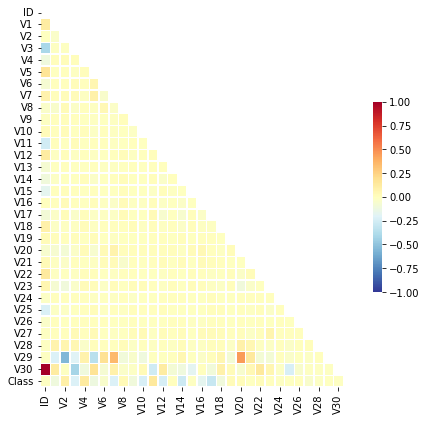

In [ ]:
df = valid.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = False,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [ ]:
abs(df['Class']).sort_values(ascending=False)

Class    1.000000
V17      0.290434
V14      0.270852
V12      0.239264
V10      0.226813
V7       0.214810
V3       0.212345
V16      0.169542
V11      0.142082
V4       0.126146
V5       0.112254
V1       0.109284
V9       0.098666
V2       0.096823
V18      0.096104
V6       0.045676
V27      0.043127
V8       0.038359
V19      0.024223
V28      0.018156
V22      0.016996
V20      0.015873
V30      0.010476
V24      0.010131
V15      0.009532
ID       0.008435
V26      0.005371
V23      0.005015
V25      0.003573
V13      0.001800
V29      0.001762
V21      0.001090
Name: Class, dtype: float64

ㅋㅋㅋ형편없네
차원축소하거나 변수 추려서 해야할 듯
지금 상태로 하면 답 없을 듯

# pycaret - anomaly detection
원 데이터로

In [ ]:
!pip install pycaret

In [3]:
from pycaret.anomaly import *

In [52]:
s = setup(train.iloc[:, 1:])

,Description,Value
0,session_id,6135
1,Original Data,"(113842, 30)"
2,Missing Values,False
3,Numeric Features,30
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(113842, 30)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

In [1]:
!pip install numpy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
print(np.__version__)

1.20.0


In [70]:
iforest = create_model('iforest')
print(iforest)

INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=6135, verbose=0)
INFO:logs:create_model() succesfully completed......................................


IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=6135, verbose=0)


In [71]:
result = assign_model(iforest)
result.head()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=6135, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : Isolation Forest
INFO:logs:Copying data
INFO:logs:(113842, 32)
INFO:logs:assign_model() succesfully completed......................................


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,Anomaly,Anomaly_Score
0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972,1,0.014987
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972,0,-0.060334
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960,0,-0.112684
3,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901,0,-0.025410
4,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901,0,-0.078612


In [72]:
result.Anomaly.value_counts()

0    108149
1      5693
Name: Anomaly, dtype: int64

In [73]:
predictions = predict_model(iforest, data = valid.iloc[:, 1:])
predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=6135, verbose=0), ml_usecase=MLUsecase.ANOMALY)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,V29,V30,Class,Anomaly,Anomaly_Score
0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0,0,-0.096572
1,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,0.724396,...,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0,0,-0.029578
2,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,0.757952,...,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0,0,-0.086906
3,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,-0.225495,...,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0,0,-0.064143
4,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,6.051521,...,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0,1,0.045210


In [74]:
anomal_list = []

for i in predictions.index :
  if predictions['Class'][i] != predictions['Anomaly'][i] :
    anomal_list.append(i)
print(anomal_list)
print('잘못 예측한 개수 :', len(anomal_list)) # 적을 수록 좋음
print('전체 Anomaly 수 :', predictions.Anomaly.value_counts()[1])

[4, 11, 26, 56, 68, 79, 150, 172, 191, 208, 226, 232, 239, 257, 349, 392, 442, 457, 458, 461, 475, 484, 487, 488, 496, 503, 508, 511, 512, 521, 523, 534, 543, 562, 574, 584, 596, 609, 634, 640, 642, 651, 656, 662, 675, 687, 696, 702, 719, 720, 727, 728, 730, 741, 744, 762, 764, 779, 833, 841, 844, 854, 868, 886, 897, 900, 914, 916, 918, 934, 946, 957, 960, 1000, 1004, 1014, 1016, 1040, 1044, 1047, 1060, 1064, 1072, 1081, 1085, 1094, 1103, 1108, 1109, 1110, 1122, 1155, 1174, 1182, 1186, 1200, 1202, 1203, 1210, 1211, 1219, 1226, 1253, 1257, 1275, 1280, 1307, 1309, 1311, 1324, 1325, 1333, 1335, 1340, 1343, 1344, 1345, 1350, 1411, 1415, 1416, 1419, 1422, 1429, 1437, 1446, 1447, 1457, 1458, 1480, 1516, 1572, 1581, 1604, 1640, 1660, 1792, 1798, 1800, 1830, 1834, 1843, 1936, 1947, 2003, 2016, 2031, 2065, 2087, 2111, 2118, 2129, 2145, 2160, 2173, 2224, 2277, 2288, 2339, 2341, 2352, 2435, 2447, 2452, 2455, 2487, 2488, 2512, 2599, 2607, 2665, 2715, 2750, 2821, 2851, 2865, 2895, 2930, 2979, 3016,

In [75]:
predictions['Class'].value_counts()

0    28432
1       30
Name: Class, dtype: int64

In [76]:
predictions['Class'].value_counts()[1] / len(predictions)

0.0010540369615627855

In [77]:
predictions['Anomaly'].value_counts()[1] / len(predictions)

0.048345161970346426

In [78]:
df = predictions.loc[anomal_list]
df[df.Anomaly==0]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,V29,V30,Class,Anomaly,Anomaly_Score
9326,1.080433,0.962831,-0.278065,2.743318,0.412364,-0.320778,0.041290,0.176170,-0.966952,-0.194120,...,-0.026373,0.400300,0.072828,0.027043,0.063238,-0.307413,-0.236222,1,0,-0.082780
12377,-1.410852,2.268271,-2.297554,1.871331,0.248957,-1.208799,-1.358648,1.102916,-1.317364,-4.626919,...,-0.464376,0.118473,-0.484537,0.373596,0.187657,-0.293440,-0.088229,1,0,-0.005966
13706,-1.464897,1.975528,-1.077145,2.819191,0.069850,-0.789044,-1.196101,0.673654,-1.363724,-2.932895,...,-0.406166,0.157769,-0.104393,0.073796,-0.041570,-0.293440,-0.028231,1,0,-0.031393
14221,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,-0.713474,...,0.114963,0.156365,-0.619437,-0.120351,0.035594,4.643750,0.001140,1,0,-0.087560
24110,-2.423535,1.659093,-3.071421,2.588033,1.135791,-1.892388,-2.588418,-2.226592,-1.670173,-3.508925,...,-0.281719,0.299285,-0.263801,0.150156,0.292112,-0.177601,0.778404,1,0,-0.000626
28146,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,...,-0.450261,0.313267,-0.289617,0.002988,-0.015309,0.286872,1.006309,1,0,-0.082731


In [79]:
df[df.Anomaly==1]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,V29,V30,Class,Anomaly,Anomaly_Score
4,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,6.051521,...,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0,1,0.045210
11,-1.640014,-0.479831,1.613630,2.997979,-3.803788,5.051812,3.315254,-0.303785,0.671395,0.744104,...,-1.268700,0.494090,0.610967,0.608993,-0.410034,12.795221,-0.993891,0,1,0.065720
26,-4.066862,-5.081215,-0.116908,-1.312829,2.688762,2.755895,-1.999095,1.726413,-0.413594,-0.769343,...,1.059320,0.606301,-0.183101,-0.057777,-0.532404,4.660239,-0.992998,0,1,0.030114
56,-2.595500,1.311592,1.323081,-1.127849,0.307467,-0.518202,-2.098817,-4.382469,1.724535,0.198680,...,0.485594,-0.535158,-0.684143,-0.422542,0.047078,0.587438,-0.990366,0,1,0.023702
68,-2.264656,-0.707192,1.080243,-4.657545,-0.157183,-0.345406,0.595042,-0.386704,2.211141,0.788946,...,-0.332603,0.050197,-1.168870,-0.208793,-0.486754,0.402152,-0.989579,0,1,0.008870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28393,-4.261670,-6.068971,1.887490,0.344141,3.637986,-3.504137,-4.730907,0.258097,0.546131,1.187413,...,0.202434,-1.699695,1.359589,0.921004,-0.074866,0.880319,1.027585,0,1,0.035293
28398,-1.448606,-2.673922,-3.563343,-0.194096,0.007561,4.999178,4.136303,0.159725,-2.951736,0.109098,...,0.683422,0.446953,1.403290,-0.242420,0.221515,14.896108,1.028055,0,1,0.085309
28424,0.010585,-0.245014,1.042166,-1.870335,-1.930421,-0.551381,-1.159154,0.432439,0.599915,-0.703907,...,0.029177,-1.029475,-0.543961,0.259752,0.167630,-0.144624,1.031462,0,1,0.038113
28429,0.643223,-3.380753,-3.890511,-0.386292,-0.266371,-0.822619,1.514705,-0.729189,-0.901784,0.565653,...,0.140447,0.508555,0.220468,-0.278604,0.058006,12.268567,1.031908,0,1,0.000566


In [80]:
submission = predict_model(iforest, data = test.iloc[:, 1:])
submission.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=6135, verbose=0), ml_usecase=MLUsecase.ANOMALY)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,Anomaly,Anomaly_Score
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983,0,-0.089470
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983,0,-0.113192
2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960,0,-0.089445
3,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937,0,-0.105569
4,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,0.309755,...,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866,0,-0.067261


In [81]:
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission.head(3)

,ID,Class
0,AAAA0x1,1
1,AAAA0x2,1
2,AAAA0x5,1


In [82]:
sample_submission['Class'] = submission.Anomaly
sample_submission.to_csv('submit.csv', index=False)

fraction=0.005 설정 여부에 관계없이 f1-score가 0.6461로 일치 <br/>
= 다~ 틀렸다!^^